### Signal processing application in 3 mins long G critical simluated LFPs

In [1]:
import pandas as pd
import h5py
import numpy as np
import matplotlib.pyplot as plt
import sys
from scipy.signal import hilbert, chirp
# import tools
sys.path.append("/mnt/c/Users/wayne/tvb/tvbtools")
from tools.signalTools import signalToolkit
import ipywidgets as widgets
my_layout = widgets.Layout()
plt.style.use('ggplot')
%matplotlib inline

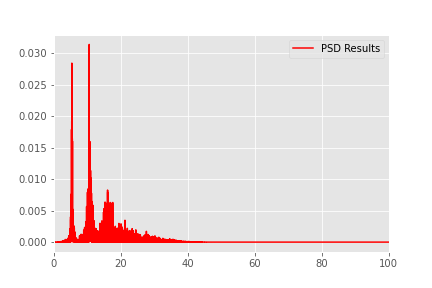

(array([0.00000000e+00, 5.55555556e-03, 1.11111111e-02, ...,
        4.09599833e+04, 4.09599889e+04, 4.09599944e+04]),
 array([9.90789596e-31, 9.57899661e-06, 3.87278719e-06, ...,
        8.26899387e-15, 8.26902403e-15, 8.26899951e-15]))

In [2]:
# import example data
filename = "/mnt/c/Users/wayne/tvb/gc3mins/SNC/2820A.h5"
subjects = signalToolkit(filename, fs=81920.)
subjects.signalpreprocessing(channelNum = 4, filter = True, low=50., high=60., spikesDetection = True)
%matplotlib widget
subjects.psd(visual = True)

In [ ]:
%matplotlib widget
filtered, N, delay = signalToolkit.fir_bandpass(dset[:,5], fs, 2.0, 8.)
freqNum = signalToolkit.freqCount(filtered, 0.5, 81920., normalization = True, filter=False, visual=True)

In [ ]:
%matplotlib widget
filtered, N, delay = signalToolkit.fir_bandpass(dset[:,4], fs, 2.0, 8.)
print(signalToolkit.ampCount(filtered, fs, mode='p20', normalization=True))